## Problem Objective


### To predict the median housing price in any district/block in california, given all the other metrics.

### Districts/ block : smallest geographical units(a block group typically has a population of 600 to 3,000 people). 

There are 20,640 districts in the project dataset.

### Importing Necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Importing dataset

In [2]:
df = pd.read_csv('E:\\ml_revision\\regularizaiton\\datasets\\1553768847-housing.csv')

## Dataset Introduction 

longitude (signed numeric - float) : Longitude value for the block in California, USA


latitude (numeric - float ) : Latitude value for the block in California, USA


housing_median_age (numeric - int ) : Median age of the house in the block


total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block


total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block


population (numeric - int ) : Count of the total number of population in the block


households (numeric - int ) : Count of the total number of households in the block


median_income (numeric - float ) : Median of the total household income of all the houses in the block


ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]


median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

_

In [3]:
# check first 5 rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


* Here median_house_value is the output column and rest are input columns.

* Median_house_value tell use the median price of houses in the specific block in the state

In [4]:
# Getting the information about the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
x = df.iloc[: , : -1]
y = df.iloc[: , -1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23, test_size= 0.2)

### Categorical colums :

Here in the dataset, only a single column 'ocean_proximity' is categorical.

It is having categories as : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' 

In [7]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# Check for the null values
df.isnull().sum()
# 207 null values are present in the column 'total_bedrooms'

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### In order to handel the missing values, we can fill it with the help of : 

- Mean -> Average of all values present in the feature.

- Median -> Middle value of the all values present.

- Mode -> Here, we uses most repeating value in the dataset to fill in vaccant places.

- Arbitary value -> Sometime, it is useful to place relatable arbitary value in vaccant places to have better distribution of data and to obtain better results.

### Here in this case we will use the mean of the column to fill the missing values that feature.

Because, as u see data is some what distributed normally (although right skewed).

<Axes: xlabel='total_bedrooms', ylabel='Count'>

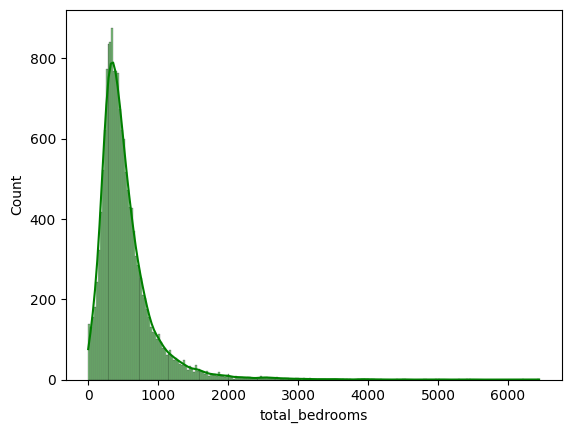

In [9]:
sns.histplot(x_train['total_bedrooms'], kde=True, color= 'Green')

In [10]:
# Mean value of the column : 
x_train['total_bedrooms'].mean()
x_test['total_bedrooms'].mean()

534.010009765625

In [11]:
x_train['total_bedrooms'].fillna(x_train['total_bedrooms'].mean(), inplace=True)
x_test['total_bedrooms'].fillna(x_train['total_bedrooms'].mean(), inplace=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_19684\2469993606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['total_bedrooms'].fillna(x_train['total_bedrooms'].mean(), inplace=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_19684\2469993606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [12]:
# Thus we dont have any missing value in the whole dataset
x_train.isnull().sum().sum()
x_test.isnull().sum().sum()

0

### Analyzing the data

Statistical measurement of the data

In [13]:
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.561351,35.621875,28.597384,2638.001332,538.838465,1429.760235,500.264474,3.867102
std,2.002626,2.135248,12.532884,2171.412657,417.486655,1137.728520,380.441023,1.892536
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1450.000000,299.000000,792.000000,281.000000,2.565800
50%,-118.480000,34.250000,29.000000,2134.500000,440.000000,1173.000000,411.000000,3.531300
75%,-118.000000,37.710000,37.000000,3159.000000,646.250000,1733.000000,607.000000,4.738600
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


### Visualize the distribution of the features

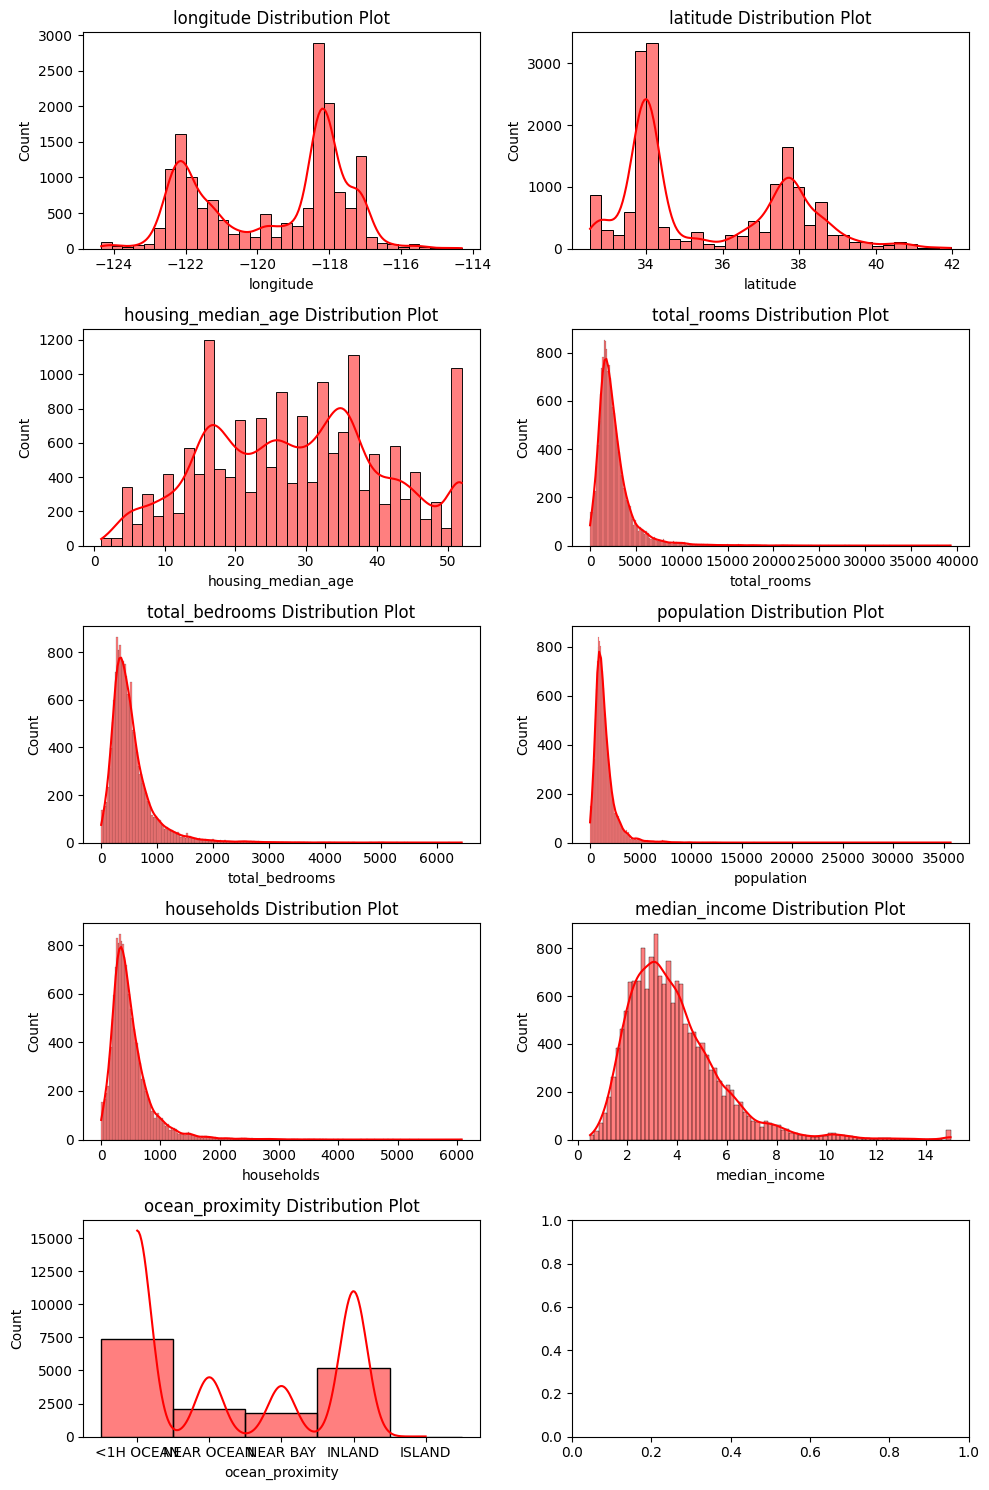

In [14]:
n_rows, n_cols = 5, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))


axes = axes.flatten()

# Loop through columns and plot
for i, column in enumerate(x_train.columns):
    sns.histplot(x_train[column], kde=True, ax=axes[i], color = 'Red')
    axes[i].set_title(f"{column} Distribution Plot")

# Adjust layout
plt.tight_layout()
plt.show()

### Better to deal with outliers if present in the dataset

### Checking the presence of outlier in the dataset with the help of box plot

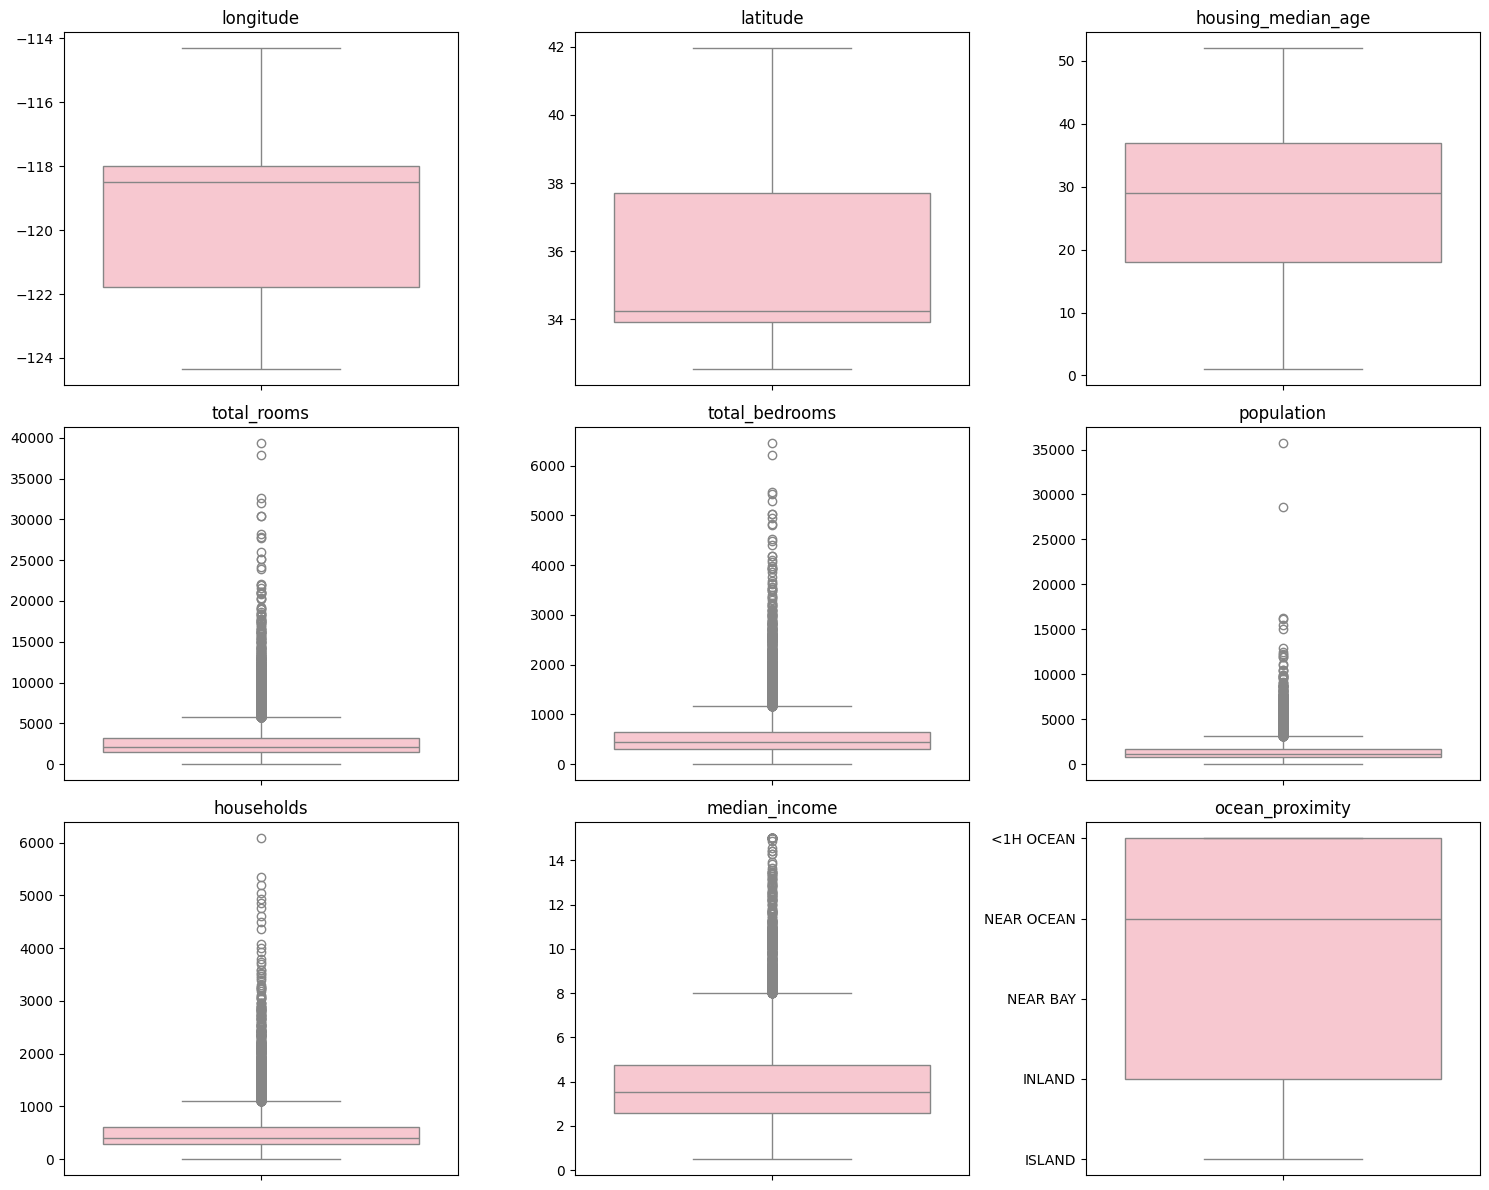

In [15]:
n_cols = 3  # Number of plots per row
n_rows = (len(x_train.columns) + n_cols - 1) // n_cols  # Calculate total rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) 

# Flatten the axes array for easier indexing (even if it's a single row)
axes = axes.flatten()


for i, column in enumerate(x_train.columns):
    sns.boxplot(data=x_train[column], ax=axes[i], color= 'Pink')
    axes[i].set_title(column)
    axes[i].set_ylabel("") 

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


### Let us look at the mathematical values showing percentiles about data

We will calculate the upper and lower limit for each of the columns and will cap the outliers accordingly.

In [16]:
class Outliers:
    def __init__(self, data):
        self.data = data  # Store the DataFrame
        self.stats = {}  # Store stats like IQR, percentiles for each column

    def quantile_values(self, column): # Calculate and print the 25th and 75th percentiles and IQR for a column.
        _25_percentile = self.data[column].quantile(0.25)
        _75_percentile = self.data[column].quantile(0.75)
        iqr = _75_percentile - _25_percentile

        # Store the stats for later use
        self.stats[column] = {
            '_25_percentile': _25_percentile,
            '_75_percentile': _75_percentile,
            'iqr': iqr
        }

        print(f"\nColumn: {column}")
        print(f"  25th Percentile: {_25_percentile}")
        print(f"  75th Percentile: {_75_percentile}")
        print(f"  IQR: {iqr}")

    def fix_outliers(self, column):
        if column not in self.stats: # cap the outliers
            raise ValueError(f"Quantiles for column '{column}' not calculated. Run quantile_values() first.")

        # Retrieve stored stats
        stats = self.stats[column]
        _25_percentile = stats['_25_percentile']
        _75_percentile = stats['_75_percentile']
        iqr = stats['iqr']

        # Calculate limits
        upperlimit = _75_percentile + 1.5 * iqr
        lowerlimit = _25_percentile - 1.5 * iqr
        print(f"Upper limit: {upperlimit}")
        print(f"Lower limit: {lowerlimit}")

        # Cap the values in the column
        self.data[column] = np.where(self.data[column] > upperlimit, upperlimit, self.data[column])
        self.data[column] = np.where(self.data[column] < lowerlimit, lowerlimit, self.data[column])

        print(f"Outliers fixed for column: {column}")

Have  a look on upper and lower bound of each column along with the iqr value.

In [17]:
outlier_handler = Outliers(x_train)

for column in x_train.columns:
    if column == 'ocean_proximity':  # Skip non-numeric column
        continue
    outlier_handler.quantile_values(column)  # Calculate IQR
    outlier_handler.fix_outliers(column)  # Fix outliers
    print(f"Processed column: {column}")


Column: longitude
  25th Percentile: -121.79
  75th Percentile: -118.0
  IQR: 3.7900000000000063
Upper limit: -112.315
Lower limit: -127.47500000000002
Outliers fixed for column: longitude
Processed column: longitude

Column: latitude
  25th Percentile: 33.93
  75th Percentile: 37.71
  IQR: 3.780000000000001
Upper limit: 43.38
Lower limit: 28.259999999999998
Outliers fixed for column: latitude
Processed column: latitude

Column: housing_median_age
  25th Percentile: 18.0
  75th Percentile: 37.0
  IQR: 19.0
Upper limit: 65.5
Lower limit: -10.5
Outliers fixed for column: housing_median_age
Processed column: housing_median_age

Column: total_rooms
  25th Percentile: 1450.0
  75th Percentile: 3159.0
  IQR: 1709.0
Upper limit: 5722.5
Lower limit: -1113.5
Outliers fixed for column: total_rooms
Processed column: total_rooms

Column: total_bedrooms
  25th Percentile: 299.0
  75th Percentile: 646.25
  IQR: 347.25
Upper limit: 1167.125
Lower limit: -221.875
Outliers fixed for column: total_bedr

### Convert categorical column into numerical columns:

Will apply one hot encoding with k-1 encoding.

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)

In [19]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [20]:
transformer = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to the 'ocean_proximity' column
        ('tf1', OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32), ['ocean_proximity']),
        
        # Apply StandardScaler to numerical columns
        ('tf3', StandardScaler(), ['latitude', 'longitude', 'housing_median_age', 
                                   'total_rooms', 'total_bedrooms', 'population', 
                                   'households', 'median_income'])
    ],
    remainder='passthrough'  # Keep the columns not explicitly mentioned
)


x_train

In [21]:
# Transform the data
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.transform(x_test)

# Convert to DataFrame
transformed_columns = (
    transformer.named_transformers_['tf1'].get_feature_names_out(['ocean_proximity']).tolist() +
    ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
     'total_bedrooms', 'population', 'households', 'median_income'] +
    x_train.columns[~x_train.columns.isin(['ocean_proximity', 'latitude', 'longitude', 'housing_median_age', 
                                           'total_rooms', 'total_bedrooms', 'population', 
                                           'households', 'median_income'])].tolist()
)

x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=transformed_columns)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=transformed_columns)



In [22]:
x_train_transformed_df.head()

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.0,0.0,0.0,0.0,-0.698710,0.659829,1.308806,-0.340803,-0.228363,-0.127167,-0.152491,0.139107
1,0.0,0.0,0.0,1.0,0.935809,-1.422500,0.830051,0.477443,0.891221,0.604365,0.846181,-0.348764
2,0.0,0.0,0.0,0.0,-0.778329,0.539983,-1.005177,-1.107731,-1.133857,-1.439238,-1.207480,2.543701
3,0.0,0.0,0.0,1.0,0.865558,-1.337609,0.909843,-0.673661,-0.821497,-0.850889,-0.689372,1.409170
4,0.0,0.0,1.0,0.0,0.996694,-1.437481,1.388598,-0.662970,-0.747794,-1.001881,-0.681863,0.284148


In [24]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18552,-122.04,36.96,32,1438,306.0,802,293,4.1964,NEAR OCEAN
4724,-118.37,34.06,52,2239,423.0,832,411,5.0858,<1H OCEAN
15423,-117.26,33.20,13,3163,725.0,1675,629,2.8214,<1H OCEAN
1763,-122.34,37.95,45,1128,240.0,702,270,3.6719,NEAR BAY
14100,-117.09,32.76,31,1235,387.0,816,397,1.5517,NEAR OCEAN


In [25]:
# lr = LinearRegression()
# lr.fit(x_train_transformed_df, y_train)
# pred = lr.predict(x_test_transformed_df)

In [26]:
# print("R2_score : ", r2_score(y_test, pred))
# print("Coefficient : ", lr.coef_)
# print("Intercept : ", lr.intercept_)

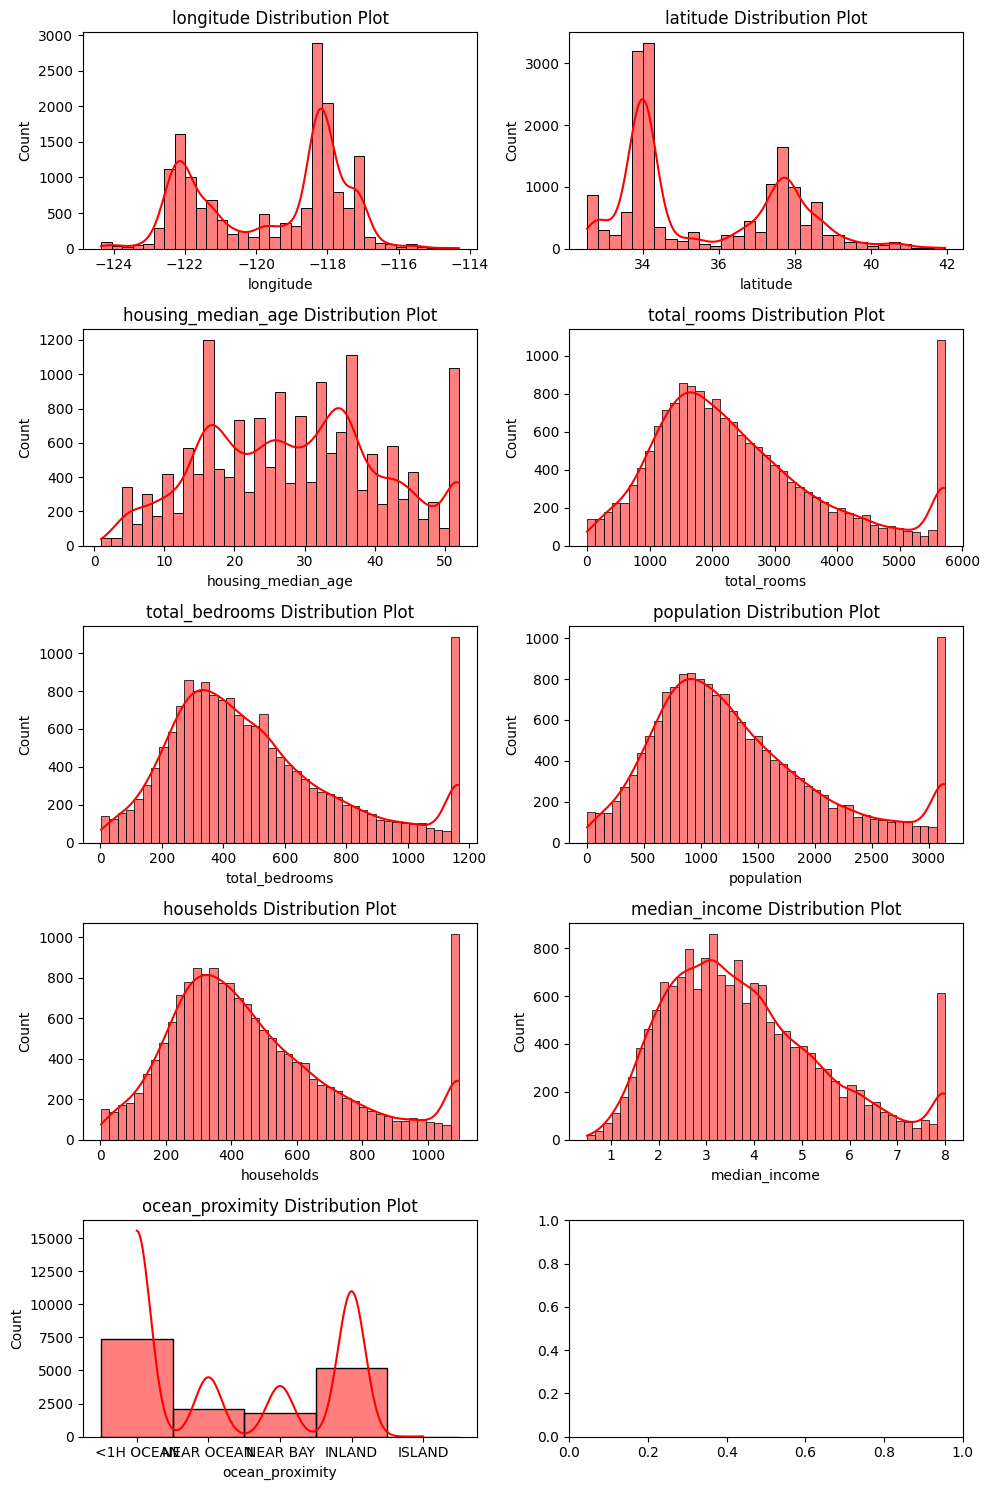

In [27]:
n_rows, n_cols = 5, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))


axes = axes.flatten()

# Loop through columns and plot
for i, column in enumerate(x_train.columns):
    sns.histplot(x_train[column], kde=True, ax=axes[i], color = 'Red')
    axes[i].set_title(f"{column} Distribution Plot")

# Adjust layout
plt.tight_layout()
plt.show()

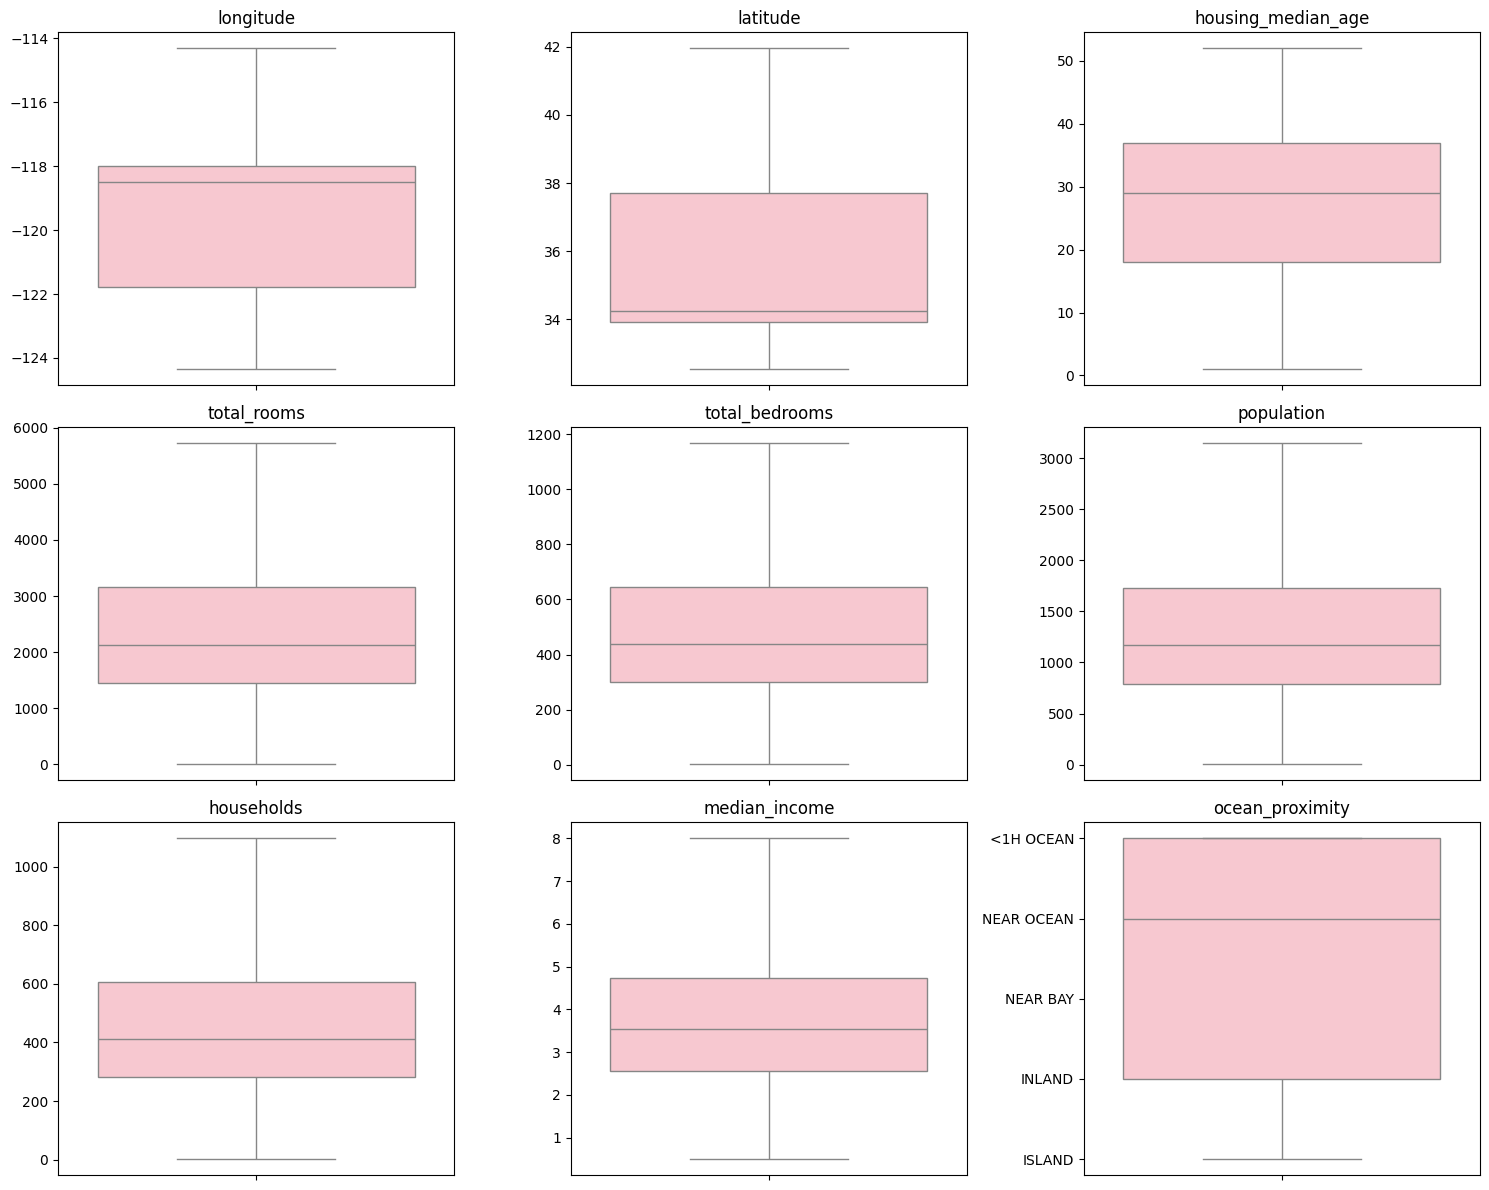

In [29]:
n_cols = 3  # Number of plots per row
n_rows = (len(x_train.columns) + n_cols - 1) // n_cols  # Calculate total rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) 

# Flatten the axes array for easier indexing (even if it's a single row)
axes = axes.flatten()


for i, column in enumerate(x_train.columns):
    sns.boxplot(data=x_train[column], ax=axes[i], color= 'Pink')
    axes[i].set_title(column)
    axes[i].set_ylabel("") 

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LinearRegression()
lr.fit(x_train_transformed_df, y_train)
pred = lr.predict(x_test_transformed_df)

# Perform cross-validation
cv_scores = cross_val_score(lr, x_test_transformed_df, y_train, cv=5, scoring=r2_score)


print("R2_score : ", r2_score(y_test, pred))
print("Coefficient : ", lr.coef_)
print("Intercept : ", lr.intercept_)

R2_score :  0.6401826690359179
Coefficient :  [-35758.78068423 148742.674319    -9289.17480569   3232.29596333
 -52134.24111039 -50786.51856342  15795.99597445 -21069.17783003
  42411.00180556 -51585.34656419  35193.44898245  77448.07467613]
Intercept :  218687.8202142244
